In [11]:
%matplotlib inline
import numpy as np
import random
from __future__ import division
import wave, struct, numpy as np, matplotlib.mlab as mlab, pylab as pl
import matplotlib.pyplot as plt
import math

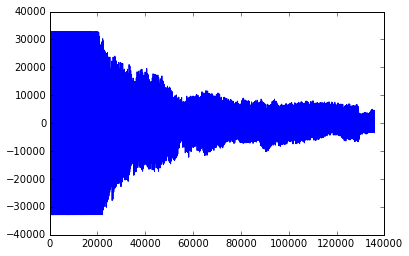

In [12]:
filename = "CG.wav"
w = wave.open(filename,"rb")

#returns a named tuple (nchannels, sampwidth, framerate, 
# nframes, comptype, compname)
waveParams = w.getparams()

s = w.readframes(waveParams[3])
w.close()
waveArray = np.fromstring(s, np.int16)

pl.figure()
pl.plot(waveArray)

spectrum, freq, bins = mlab.specgram(waveArray, NFFT=256,Fs=waveParams[2],sides='onesided')



In [99]:
# calculates and returns spectrogram of 
def get_wave(filename):
    w = wave.open(filename,"rb")
    waveParams = w.getparams()
    s = w.readframes(waveParams[3])
    w.close()
    waveArray = np.fromstring(s, np.int16)
    return waveArray

# power spectrogram is the absolute value SQUARED of the stft
def get_sepctrogram(stft):
    return abs(stft)**2

# takes in wave file as input
# win_size is the length of the window in samples
# overlap is the amount of overlap between windows in samples
def my_stft(wave, win_size, overlap):
    # power sinbell analysis window
    win = power_sinebell(win_size, overlap)
    # make the frames
    frames, wave_pad = make_frames(wave, win, overlap)
    # fft, row-wise
    stft = np.fft.fft(frames)
    print(stft.shape)
    print(frames.shape)
    # keep the spectrum associated with the positive frequencies (potentially times to the upper frequencies)
    if len(win)%2 == 0:
        stft = stft[:len(win)/2]
    else:
        stft = stft[:(len(win)-1)/2]
    return stft
    
# create sinebell window of length win_size, with overlap, DONE
def sinebell(win_size, overlap):
    win = np.zeros(win_size)
    win[0:overlap] = np.sin( math.pi * (np.array([i for i in range(overlap)])) / (2*overlap) )
    win[overlap : win_size - overlap] = 1
    win[win_size - overlap:] = np.sin( math.pi * (win_size - np.array([i for i in range(win_size-overlap, win_size)]) - 1 ) / (2*overlap) )
    return win

# computes sinebell window with smooth edges, this should be an improvement
def power_sinebell(win_size, overlap):
    win = np.zeros(win_size)
    win[0:overlap] = np.sin( math.pi * (np.array([i for i in range(overlap)])) / (2*overlap) )**2
    win[overlap : win_size - overlap] = 1
    win[win_size - overlap:] = np.sin( math.pi * (win_size - np.array([i for i in range(win_size-overlap, win_size)]) - 1 ) / (2*overlap) )**2
    return win

# x is the input signal, win is the analysis window, overlap
# returns frame matrix and padded input signal x_pad
def make_frames(x, win, overlap):
    win_len = win.shape[0]
    x_len = len(x)
    
    # number of frames
    num_frames = int(np.ceil((x_len + overlap)/(win_len - overlap)))
    
    # initializing zero padded signal
    pad_len = overlap + num_frames *(win_len - overlap)

    x_pad = np.zeros(pad_len)
    x_pad[overlap: overlap + x_len] = x
    
    # index of beginning of each frame in x_pad
    frame_ind = np.array([i for i in range(num_frames)]) * (win_len - overlap)
    
    # initialize frames matrix
    frames = np.zeros((win_size, num_frames))
    for i in range(num_frames):
        frames[:,i] = (x_pad[frame_ind[i] : frame_ind[i] + win_size] * win)
    
    return frames, x_pad
    
def my_istft(stft):
    print(hi)

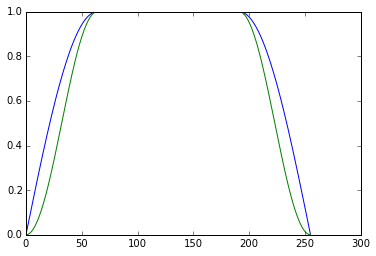

In [100]:
# pretty sinebell window
win_size = 256
overlap = 64
win = sinebell(win_size, overlap)
pwin = power_sinebell(win_size, overlap)
plt.plot([i for i in range(win_size)], win, [i for i in range(win_size)], pwin)

In [101]:
# filenames = "CML_Recording_Both.wav", "CG.wav"
wave_arr = get_wave("CG.wav")


In [102]:
frames, x_pad = make_frames(wave_arr, pwin, overlap)

In [103]:
print(wave_arr.shape)
print(frames.shape)
print(x_pad.shape)

(135828,)
(256, 708)
(136000,)
